In [83]:
from satpy import Scene, MultiScene, find_files_and_readers
from glob import glob
from datetime import datetime
import xarray as xr
from satpy.readers import olci_nc
from pyresample.geometry import AreaDefinition
from satpy.writers import get_enhanced_image, to_image
from satpy.composites import SingleBandCompositor, DifferenceCompositor
from trollimage.colormap import ylgnbu, rdylgn, rdylbu, rdbu, ylgn, blues
import cmocean
import cmocean.cm as cmo
from trollimage.image import Image
from trollimage.colormap import Colormap
from pycoast import ContourWriterAGG
import os
import numpy as np
from flag_tools import flag_mask

In [ ]:
cmocean.tools.get_dict

In [74]:

cm_data = [[ 0.06885643, 0.14208946, 0.07903363],
           [ 0.07022733, 0.145481  , 0.08182252],
           [ 0.07158041, 0.14886551, 0.08459735],
           [ 0.07289843, 0.15224692, 0.08735815],
           [ 0.07419261, 0.15562329, 0.09010536],
           [ 0.07545752, 0.15899606, 0.0928391 ],
           [ 0.07669294, 0.16236561, 0.09555954],
           [ 0.0779044 , 0.16573113, 0.09826708],
           [ 0.07908113, 0.16909506, 0.10096151],
           [ 0.08023865, 0.17245461, 0.10364358],
           [ 0.0813567 , 0.17581401, 0.1063126 ],
           [ 0.08245885, 0.17916893, 0.10896978],
           [ 0.08351901, 0.18252464, 0.11161396],
           [ 0.08456274, 0.18587646, 0.1142466 ],
           [ 0.08556724, 0.18922894, 0.11686652],
           [ 0.08655243, 0.19257854, 0.119475  ],
           [ 0.08750046, 0.19592877, 0.12207102],
           [ 0.08842694, 0.19927694, 0.12465567],
           [ 0.08931759, 0.20262583, 0.12722804],
           [ 0.09018515, 0.2059733 , 0.1297891 ],
           [ 0.09101742, 0.20932169, 0.13233799],
           [ 0.09182583, 0.21266913, 0.13487564],
           [ 0.09259864, 0.21601782, 0.13740115],
           [ 0.09334765, 0.21936582, 0.13991552],
           [ 0.09405985, 0.22271554, 0.14241766],
           [ 0.09474918, 0.22606468, 0.14490881],
           [ 0.09539954, 0.22941612, 0.14738752],
           [ 0.0960289 , 0.23276689, 0.14985548],
           [ 0.09661612, 0.23612068, 0.15231064],
           [ 0.09718523, 0.23947356, 0.15475537],
           [ 0.09770794, 0.2428303 , 0.1571868 ],
           [ 0.09821309, 0.24618625, 0.15960787],
           [ 0.09867327, 0.24954595, 0.16201567],
           [ 0.09911166, 0.25290573, 0.16441267],
           [ 0.09951033, 0.25626852, 0.16679686],
           [ 0.09988043, 0.25963262, 0.16916945],
           [ 0.1002173 , 0.26299882, 0.17152986],
           [ 0.10051752, 0.2663677 , 0.17387765],
           [ 0.10079233, 0.2697376 , 0.17621409],
           [ 0.10102103, 0.27311168, 0.17853665],
           [ 0.10122817, 0.27648631, 0.18084823],
           [ 0.10138903, 0.2798652 , 0.18314573],
           [ 0.10152195, 0.28324567, 0.18543137],
           [ 0.10161961, 0.28662882, 0.18770415],
           [ 0.10167654, 0.29001546, 0.18996328],
           [ 0.10170933, 0.29340326, 0.19221085],
           [ 0.10169001, 0.29679616, 0.19444309],
           [ 0.1016439 , 0.30019064, 0.19666326],
           [ 0.10156046, 0.30358817, 0.19886988],
           [ 0.10143361, 0.30698958, 0.201062  ],
           [ 0.10127976, 0.31039267, 0.20324181],
           [ 0.1010766 , 0.31380039, 0.20540608],
           [ 0.10083896, 0.31721078, 0.20755678],
           [ 0.10057112, 0.32062332, 0.20969446],
           [ 0.10024781, 0.32404118, 0.21181533],
           [ 0.09989443, 0.32746115, 0.21392297],
           [ 0.0995047 , 0.33088402, 0.21601636],
           [ 0.09906254, 0.3343117 , 0.218093  ],
           [ 0.0985884 , 0.33774172, 0.2201558 ],
           [ 0.09807546, 0.34117488, 0.22220362],
           [ 0.09750943, 0.34461278, 0.22423417],
           [ 0.09690948, 0.3480532 , 0.22625023],
           [ 0.09627239, 0.35149649, 0.22825119],
           [ 0.09557752, 0.35494489, 0.23023372],
           [ 0.09484678, 0.35839595, 0.23220107],
           [ 0.09407947, 0.36184972, 0.23415298],
           [ 0.09325665, 0.36530817, 0.23608636],
           [ 0.09239033, 0.36876996, 0.23800293],
           [ 0.09148554, 0.37223456, 0.23990332],
           [ 0.09053798, 0.37570238, 0.2417867 ],
           [ 0.08953167, 0.3791749 , 0.24365037],
           [ 0.08848513, 0.38265026, 0.2454971 ],
           [ 0.08739776, 0.3861285 , 0.24732662],
           [ 0.08626466, 0.38961004, 0.24913796],
           [ 0.08507286, 0.39309597, 0.25092886],
           [ 0.08383877, 0.39658475, 0.25270175],
           [ 0.0825619 , 0.40007639, 0.25445635],
           [ 0.08124183, 0.4035709 , 0.25619236],
           [ 0.07986463, 0.40706939, 0.25790734],
           [ 0.07843839, 0.41057109, 0.25960234],
           [ 0.07696833, 0.41407555, 0.26127794],
           [ 0.07545435, 0.41758275, 0.26293384],
           [ 0.07389642, 0.42109266, 0.26456976],
           [ 0.07228966, 0.42460561, 0.26618462],
           [ 0.07062863, 0.42812193, 0.26777721],
           [ 0.06892492, 0.43164076, 0.26934902],
           [ 0.06717918, 0.43516204, 0.27089974],
           [ 0.06539233, 0.43868571, 0.27242909],
           [ 0.06356557, 0.44221171, 0.27393677],
           [ 0.06170041, 0.44573995, 0.27542249],
           [ 0.05979877, 0.44927035, 0.27688596],
           [ 0.05785702, 0.45280318, 0.27832599],
           [ 0.05588066, 0.45633814, 0.27974269],
           [ 0.05387746, 0.45987489, 0.28113643],
           [ 0.05185174, 0.4634133 , 0.28250695],
           [ 0.04980869, 0.46695324, 0.28385397],
           [ 0.04775453, 0.47049459, 0.28517723],
           [ 0.04569662, 0.47403719, 0.28647649],
           [ 0.04364369, 0.47758089, 0.28775151],
           [ 0.04160606, 0.48112551, 0.28900203],
           [ 0.0395867 , 0.48467089, 0.29022786],
           [ 0.03763814, 0.48821682, 0.29142876],
           [ 0.03580155, 0.49176311, 0.29260454],
           [ 0.03408899, 0.49530953, 0.29375502],
           [ 0.03251323, 0.49885586, 0.29488003],
           [ 0.03108771, 0.50240186, 0.29597942],
           [ 0.02982666, 0.50594726, 0.29705307],
           [ 0.02874508, 0.50949179, 0.29810087],
           [ 0.02785177, 0.51303546, 0.29912154],
           [ 0.02716441, 0.51657792, 0.3001151 ],
           [ 0.02670582, 0.52011863, 0.30108235],
           [ 0.02649479, 0.52365722, 0.30202332],
           [ 0.02655111, 0.52719334, 0.30293807],
           [ 0.0268957 , 0.53072659, 0.30382669],
           [ 0.02754542, 0.53425678, 0.30468824],
           [ 0.02851433, 0.53778386, 0.30552072],
           [ 0.02984163, 0.54130675, 0.30632735],
           [ 0.03155357, 0.54482496, 0.30710846],
           [ 0.03367174, 0.54833822, 0.3078629 ],
           [ 0.03621581, 0.55184641, 0.30858828],
           [ 0.03923368, 0.55534819, 0.3092893 ],
           [ 0.04267874, 0.55884313, 0.30996532],
           [ 0.04642777, 0.56233118, 0.31061247],
           [ 0.05049037, 0.56581074, 0.31123743],
           [ 0.05483677, 0.56928169, 0.31183596],
           [ 0.05945722, 0.57274288, 0.31241135],
           [ 0.06433628, 0.57619346, 0.3129641 ],
           [ 0.0694603 , 0.57963256, 0.31349439],
           [ 0.07481987, 0.58305904, 0.31400453],
           [ 0.08040588, 0.58647176, 0.31449636],
           [ 0.08620977, 0.58986967, 0.3149695 ],
           [ 0.09222724, 0.59325117, 0.31543058],
           [ 0.0984523 , 0.59661516, 0.31587743],
           [ 0.10488194, 0.59995997, 0.31631578],
           [ 0.11151261, 0.60328396, 0.31675059],
           [ 0.11834151, 0.60658549, 0.31718585],
           [ 0.12536778, 0.6098628 , 0.31762468],
           [ 0.13258816, 0.61311399, 0.31807501],
           [ 0.13999895, 0.6163372 , 0.31854464],
           [ 0.14759587, 0.61953055, 0.31904185],
           [ 0.15537304, 0.62269226, 0.31957617],
           [ 0.16332236, 0.62582066, 0.32015839],
           [ 0.17143307, 0.62891434, 0.32080039],
           [ 0.17969137, 0.63197223, 0.32151494],
           [ 0.18808025, 0.63499369, 0.32231537],
           [ 0.19658051, 0.63797853, 0.32321469],
           [ 0.20516717, 0.6409274 , 0.32422681],
           [ 0.21381461, 0.64384147, 0.32536378],
           [ 0.22249597, 0.64672254, 0.32663605],
           [ 0.23118418, 0.64957297, 0.32805203],
           [ 0.23985293, 0.65239558, 0.32961779],
           [ 0.24847602, 0.65519373, 0.33133728],
           [ 0.25703342, 0.65797057, 0.33321113],
           [ 0.26550717, 0.66072943, 0.3352381 ],
           [ 0.2738829 , 0.66347352, 0.33741504],
           [ 0.28214978, 0.66620584, 0.33973735],
           [ 0.29030037, 0.66892916, 0.34219931],
           [ 0.29833024, 0.67164589, 0.34479452],
           [ 0.30623756, 0.67435818, 0.34751622],
           [ 0.31401727, 0.67706862, 0.35035755],
           [ 0.32167446, 0.67977832, 0.35331149],
           [ 0.32921313, 0.68248841, 0.35637146],
           [ 0.33663762, 0.6851999 , 0.35953132],
           [ 0.34394207, 0.68791541, 0.36278437],
           [ 0.35114051, 0.69063416, 0.36612568],
           [ 0.35823533, 0.69335721, 0.36954994],
           [ 0.36522563, 0.69608614, 0.37305153],
           [ 0.37212492, 0.69881984, 0.37662736],
           [ 0.37892642, 0.70156084, 0.38027132],
           [ 0.3856453 , 0.70430747, 0.38398168],
           [ 0.39227735, 0.70706166, 0.38775317],
           [ 0.39883103, 0.70982284, 0.39158356],
           [ 0.40531204, 0.71259083, 0.39547048],
           [ 0.41171522, 0.7153677 , 0.39940867],
           [ 0.41805337, 0.71815166, 0.40339835],
           [ 0.42432867, 0.72094309, 0.40743704],
           [ 0.43053587, 0.72374398, 0.41151964],
           [ 0.43668612, 0.72655264, 0.41564705],
           [ 0.44278167, 0.72936931, 0.41981738],
           [ 0.44882469, 0.73219416, 0.42402884],
           [ 0.45481188, 0.73502867, 0.42827737],
           [ 0.46075114, 0.73787164, 0.43256386],
           [ 0.46664458, 0.74072315, 0.43688699],
           [ 0.47249405, 0.74358334, 0.44124545],
           [ 0.47830134, 0.74645233, 0.44563802],
           [ 0.48406816, 0.74933022, 0.45006358],
           [ 0.48979527, 0.75221736, 0.45452056],
           [ 0.49548385, 0.75511394, 0.45900769],
           [ 0.50113714, 0.75801961, 0.46352502],
           [ 0.50675657, 0.76093444, 0.46807172],
           [ 0.51234353, 0.76385852, 0.47264701],
           [ 0.51789934, 0.76679191, 0.47725017],
           [ 0.52342527, 0.76973468, 0.48188052],
           [ 0.52892256, 0.77268689, 0.48653744],
           [ 0.53439237, 0.7756486 , 0.49122035],
           [ 0.53983582, 0.77861987, 0.4959287 ],
           [ 0.54525401, 0.78160076, 0.500662  ],
           [ 0.55064796, 0.78459132, 0.50541978],
           [ 0.55601867, 0.78759161, 0.5102016 ],
           [ 0.56136709, 0.79060167, 0.51500705],
           [ 0.56669416, 0.79362156, 0.51983577],
           [ 0.57200073, 0.79665133, 0.5246874 ],
           [ 0.57728767, 0.79969103, 0.52956161],
           [ 0.5825556 , 0.80274077, 0.53445795],
           [ 0.587804  , 0.80580103, 0.53937491],
           [ 0.59303502, 0.80887141, 0.54431345],
           [ 0.59824938, 0.81195197, 0.54927334],
           [ 0.60344779, 0.81504274, 0.55425434],
           [ 0.60863092, 0.8181438 , 0.55925625],
           [ 0.61379944, 0.82125518, 0.56427887],
           [ 0.61895395, 0.82437694, 0.56932201],
           [ 0.62409506, 0.82750913, 0.57438551],
           [ 0.62922216, 0.83065222, 0.5794679 ],
           [ 0.63433574, 0.83380631, 0.58456889],
           [ 0.63943758, 0.83697102, 0.58968966],
           [ 0.64452821, 0.84014641, 0.59483008],
           [ 0.64960814, 0.84333252, 0.59999004],
           [ 0.65467785, 0.84652942, 0.60516941],
           [ 0.65973664, 0.8497376 , 0.61036667],
           [ 0.66478454, 0.8529573 , 0.61558114],
           [ 0.66982361, 0.85618797, 0.62081462],
           [ 0.67485427, 0.85942969, 0.62606703],
           [ 0.67987695, 0.8626825 , 0.6313383 ],
           [ 0.68489103, 0.86594688, 0.63662701],
           [ 0.68989598, 0.86922324, 0.64193178],
           [ 0.69489414, 0.87251091, 0.64725509],
           [ 0.69988588, 0.87580994, 0.65259689],
           [ 0.70487156, 0.87912041, 0.6579571 ],
           [ 0.70984902, 0.88244339, 0.6633321 ],
           [ 0.71482059, 0.88577817, 0.66872453],
           [ 0.71978715, 0.88912459, 0.67413514],
           [ 0.72474903, 0.89248272, 0.67956388],
           [ 0.72970443, 0.89585351, 0.68500748],
           [ 0.73465479, 0.89923659, 0.69046752],
           [ 0.73960143, 0.90263159, 0.69594546],
           [ 0.74454464, 0.90603859, 0.70144129],
           [ 0.74948217, 0.90945876, 0.70695082],
           [ 0.75441627, 0.91289135, 0.71247711],
           [ 0.75934783, 0.91633616, 0.71802108],
           [ 0.76427661, 0.91979348, 0.72358186],
           [ 0.76920074, 0.92326438, 0.72915567],
           [ 0.77412316, 0.92674772, 0.73474699],
           [ 0.77904414, 0.93024359, 0.74035579],
           [ 0.78396177, 0.93375306, 0.74597816],
           [ 0.78887747, 0.93727567, 0.75161605],
           [ 0.79379251, 0.94081106, 0.75727124],
           [ 0.79870604, 0.9443598 , 0.76294165],
           [ 0.80361734, 0.94792244, 0.76862535],
           [ 0.80852873, 0.9514981 , 0.77432618],
           [ 0.81344004, 0.95508703, 0.7800433 ],
           [ 0.81834917, 0.95869047, 0.78577205],
           [ 0.82325913, 0.96230716, 0.79151775],
           [ 0.82817006, 0.96593722, 0.79728024],
           [ 0.8330792 , 0.96958222, 0.80305326],
           [ 0.83798987, 0.97324073, 0.80884306],
           [ 0.84290226, 0.97691284, 0.81464957]]

In [82]:
enumerated_tuples = [(idx/len(cm_data), tuple(sublst)) for idx, sublst in enumerate(cm_data)]
enumerated_tuples = tuple(enumerated_tuples)
print(enumerated_tuples)


((0.0, (0.06885643, 0.14208946, 0.07903363)), (0.00390625, (0.07022733, 0.145481, 0.08182252)), (0.0078125, (0.07158041, 0.14886551, 0.08459735)), (0.01171875, (0.07289843, 0.15224692, 0.08735815)), (0.015625, (0.07419261, 0.15562329, 0.09010536)), (0.01953125, (0.07545752, 0.15899606, 0.0928391)), (0.0234375, (0.07669294, 0.16236561, 0.09555954)), (0.02734375, (0.0779044, 0.16573113, 0.09826708)), (0.03125, (0.07908113, 0.16909506, 0.10096151)), (0.03515625, (0.08023865, 0.17245461, 0.10364358)), (0.0390625, (0.0813567, 0.17581401, 0.1063126)), (0.04296875, (0.08245885, 0.17916893, 0.10896978)), (0.046875, (0.08351901, 0.18252464, 0.11161396)), (0.05078125, (0.08456274, 0.18587646, 0.1142466)), (0.0546875, (0.08556724, 0.18922894, 0.11686652)), (0.05859375, (0.08655243, 0.19257854, 0.119475)), (0.0625, (0.08750046, 0.19592877, 0.12207102)), (0.06640625, (0.08842694, 0.19927694, 0.12465567)), (0.0703125, (0.08931759, 0.20262583, 0.12722804)), (0.07421875, (0.09018515, 0.2059733, 0.1297

In [84]:
algae = Colormap(enumerated_tuples)

ValueError: too many values to unpack (expected 2)

In [77]:
for color in cm_data:
    tuple(enumerate(color))
print(cm_data)

# tupled_list = tuple(enumerate(cm_data))
# print(tupled_list)

[[0.06885643, 0.14208946, 0.07903363], [0.07022733, 0.145481, 0.08182252], [0.07158041, 0.14886551, 0.08459735], [0.07289843, 0.15224692, 0.08735815], [0.07419261, 0.15562329, 0.09010536], [0.07545752, 0.15899606, 0.0928391], [0.07669294, 0.16236561, 0.09555954], [0.0779044, 0.16573113, 0.09826708], [0.07908113, 0.16909506, 0.10096151], [0.08023865, 0.17245461, 0.10364358], [0.0813567, 0.17581401, 0.1063126], [0.08245885, 0.17916893, 0.10896978], [0.08351901, 0.18252464, 0.11161396], [0.08456274, 0.18587646, 0.1142466], [0.08556724, 0.18922894, 0.11686652], [0.08655243, 0.19257854, 0.119475], [0.08750046, 0.19592877, 0.12207102], [0.08842694, 0.19927694, 0.12465567], [0.08931759, 0.20262583, 0.12722804], [0.09018515, 0.2059733, 0.1297891], [0.09101742, 0.20932169, 0.13233799], [0.09182583, 0.21266913, 0.13487564], [0.09259864, 0.21601782, 0.13740115], [0.09334765, 0.21936582, 0.13991552], [0.09405985, 0.22271554, 0.14241766], [0.09474918, 0.22606468, 0.14490881], [0.09539954, 0.2294161

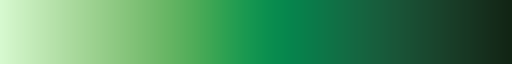

In [59]:
cmo.algae

In [69]:
cmdict = cmocean.tools.get_dict(cmocean.cm.algae, N=1)

In [70]:
print(cmdict)

{'red': [(0.0, 0.8429022637670928, 0.8429022637670928)], 'green': [(0.0, 0.9769128443086749, 0.9769128443086749)], 'blue': [(0.0, 0.8146495714674897, 0.8146495714674897)]}


In [ ]:
{'red': [(0.0, 0.8429022637670928, 0.8429022637670928), (0.1111111111111111, 0.7048715598638584, 0.7048715598638584), (0.2222222222222222, 0.5613670944828394, 0.5613670944828394), (0.3333333333333333, 0.3922773504125327, 0.3922773504125327), (0.4444444444444444, 0.17143307050053763, 0.17143307050053763), (0.5555555555555556, 0.026895704405089572, 0.026895704405089572), (0.6666666666666666, 0.06892491848697405, 0.06892491848697405), (0.7777777777777777, 0.09950470237088999, 0.09950470237088999), (0.8888888888888888, 0.09661611889067362, 0.09661611889067362), (1.0, 0.06885643403782271, 0.06885643403782271)], 'green': [(0.0, 0.9769128443086749, 0.9769128443086749), (0.1111111111111111, 0.8791204089748886, 0.8791204089748886), (0.2222222222222222, 0.7906016675911841, 0.7906016675911841), (0.3333333333333333, 0.7070616628058336, 0.7070616628058336), (0.4444444444444444, 0.628914342960667, 0.628914342960667), (0.5555555555555556, 0.5307265908415564, 0.5307265908415564), (0.6666666666666666, 0.4316407590421983, 0.4316407590421983), (0.7777777777777777, 0.330884018800639, 0.330884018800639), (0.8888888888888888, 0.2361206836681891, 0.2361206836681891), (1.0, 0.14208946011590498, 0.14208946011590498)], 'blue': [(0.0, 0.8146495714674897, 0.8146495714674897), (0.1111111111111111, 0.6579571019276891, 0.6579571019276891), (0.2222222222222222, 0.5150070514423125, 0.5150070514423125), (0.3333333333333333, 0.38775317153170563, 0.38775317153170563), (0.4444444444444444, 0.3208003886075819, 0.3208003886075819), (0.5555555555555556, 0.3038266898313282, 0.3038266898313282), (0.6666666666666666, 0.26934901774298603, 0.26934901774298603), (0.7777777777777777, 0.21601636488554055, 0.21601636488554055), (0.8888888888888888, 0.15231064240452327, 0.15231064240452327), (1.0, 0.07903362825094448, 0.07903362825094448)]}

In [2]:
western_seas_se = AreaDefinition(area_id='western_seas_se', 
                                 description='western_seas_se', 
                                 proj_id='stere', 
                                 projection={'proj': 'stere', 'lat_0': 57.3016625, 'lon_0': 11.297785},
                                 width=1884,
                                 height=1992,
                                 area_extent=(-282586.412709, -290308.210120, 282586.412709, 307359.029789)
)

open_water_flags = ['LAND', 'CLOUD', 'CLOUD_AMBIGUOUS', 'CLOUD_MARGIN',
                    'INVALID', 'COSMETIC', 'SATURATED', 'SUSPECT', 
                    'HISOLZEN', 'HIGHGLINT', 'SNOW_ICE']

In [3]:
from dataset_selector import DatasetFilter

In [4]:
df = DatasetFilter(base_dir='./data', area_definition=western_seas_se)
# bdf = df.multiscene_blend().show('masked_data')
bdf = df.multiscene_blend()

Don't know how to open the following files: {'./data\\S3A_OL_2_WFR____20240304T095509_20240304T095809_20240304T115501_0180_109_350_1980_MAR_O_NR_003.SEN3\\tie_geo_coordinates.nc', './data\\S3A_OL_2_WFR____20240304T095509_20240304T095809_20240304T115501_0180_109_350_1980_MAR_O_NR_003.SEN3\\instrument_data.nc', './data\\S3A_OL_2_WFR____20240304T095509_20240304T095809_20240304T115501_0180_109_350_1980_MAR_O_NR_003.SEN3\\manifest.xml', './data\\S3A_OL_2_WFR____20240304T095509_20240304T095809_20240304T115501_0180_109_350_1980_MAR_O_NR_003.SEN3\\browse.jpg', './data\\S3A_OL_2_WFR____20240304T095509_20240304T095809_20240304T115501_0180_109_350_1980_MAR_O_NR_003.SEN3\\iop_lsd.nc', './data\\S3A_OL_2_WFR____20240304T095509_20240304T095809_20240304T115501_0180_109_350_1980_MAR_O_NR_003.SEN3\\time_coordinates.nc', './data\\S3A_OL_2_WFR____20240304T095509_20240304T095809_20240304T115501_0180_109_350_1980_MAR_O_NR_003.SEN3\\tie_meteo.nc', './data\\S3A_OL_2_WFR____20240304T095509_20240304T095809_2024

0.38348373445734707
Added product to MultiScene (1 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3A_OL_2_WFR____20240306T090247_20240306T090547_20240306T110413_0179_109_378_1980_MAR_O_NR_003.SEN3\\iop_lsd.nc', './data\\S3A_OL_2_WFR____20240306T090247_20240306T090547_20240306T110413_0179_109_378_1980_MAR_O_NR_003.SEN3\\tie_meteo.nc', './data\\S3A_OL_2_WFR____20240306T090247_20240306T090547_20240306T110413_0179_109_3

0.1525852828179352
Added product to MultiScene (2 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3A_OL_2_WFR____20240306T104346_20240306T104646_20240306T124609_0180_109_379_1980_MAR_O_NR_003.SEN3\\w_aer.nc', './data\\S3A_OL_2_WFR____20240306T104346_20240306T104646_20240306T124609_0180_109_379_1980_MAR_O_NR_003.SEN3\\tie_geo_coordinates.nc', './data\\S3A_OL_2_WFR____20240306T104346_20240306T104646_20240306T124609_01

0.01826545600400262
Added product to MultiScene (3 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3A_OL_2_WFR____20240307T101735_20240307T102035_20240307T121815_0180_110_008_1980_MAR_O_NR_003.SEN3\\time_coordinates.nc', './data\\S3A_OL_2_WFR____20240307T101735_20240307T102035_20240307T121815_0180_110_008_1980_MAR_O_NR_003.SEN3\\xfdumanifest.xml', './data\\S3A_OL_2_WFR____20240307T101735_20240307T102035_20240307T1218

6.987817439076713e-07
Added product to MultiScene (4 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3A_OL_2_WFR____20240308T095124_20240308T095424_20240308T115323_0179_110_022_1980_MAR_O_NR_003.SEN3\\EOPMetadata.xml', './data\\S3A_OL_2_WFR____20240308T095124_20240308T095424_20240308T115323_0179_110_022_1980_MAR_O_NR_003.SEN3\\manifest.xml', './data\\S3A_OL_2_WFR____20240308T095124_20240308T095424_20240308T115323_0179_

0.4523968912597777
Added product to MultiScene (5 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3A_OL_2_WFR____20240309T092514_20240309T092814_20240309T112548_0179_110_036_1980_MAR_O_NR_003.SEN3\\browse.jpg', './data\\S3A_OL_2_WFR____20240309T092514_20240309T092814_20240309T112548_0179_110_036_1980_MAR_O_NR_003.SEN3\\instrument_data.nc', './data\\S3A_OL_2_WFR____20240309T092514_20240309T092814_20240309T112548_0179

0.4466284479638199
Added product to MultiScene (6 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3A_OL_2_WFR____20240310T085903_20240310T090203_20240310T105838_0179_110_050_1980_MAR_O_NR_003.SEN3\\instrument_data.nc', './data\\S3A_OL_2_WFR____20240310T085903_20240310T090203_20240310T105838_0179_110_050_1980_MAR_O_NR_003.SEN3\\browse.jpg', './data\\S3A_OL_2_WFR____20240310T085903_20240310T090203_20240310T105838_0179

0.04540404259214485
Added product to MultiScene (7 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3A_OL_2_WFR____20240310T104002_20240310T104302_20240310T124015_0179_110_051_1980_MAR_O_NR_003.SEN3\\xfdumanifest.xml', './data\\S3A_OL_2_WFR____20240310T104002_20240310T104302_20240310T124015_0179_110_051_1980_MAR_O_NR_003.SEN3\\time_coordinates.nc', './data\\S3A_OL_2_WFR____20240310T104002_20240310T104302_20240310T1240

0.0
Added product to MultiScene (8 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3B_OL_2_WFR____20240304T091614_20240304T091914_20240304T111612_0179_090_207_1980_MAR_O_NR_003.SEN3\\browse.jpg', './data\\S3B_OL_2_WFR____20240304T091614_20240304T091914_20240304T111612_0179_090_207_1980_MAR_O_NR_003.SEN3\\tie_meteo.nc', './data\\S3B_OL_2_WFR____20240304T091614_20240304T091914_20240304T111612_0179_090_2

0.0004807618398084779
Added product to MultiScene (9 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3B_OL_2_WFR____20240305T085004_20240305T085304_20240305T104901_0179_090_221_1980_MAR_O_NR_003.SEN3\\xfdumanifest.xml', './data\\S3B_OL_2_WFR____20240305T085004_20240305T085304_20240305T104901_0179_090_221_1980_MAR_O_NR_003.SEN3\\time_coordinates.nc', './data\\S3B_OL_2_WFR____20240305T085004_20240305T085304_20240305T1049

0.31681296827111616
Added product to MultiScene (10 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3B_OL_2_WFR____20240305T103103_20240305T103403_20240305T122959_0179_090_222_1980_MAR_O_NR_003.SEN3\\instrument_data.nc', './data\\S3B_OL_2_WFR____20240305T103103_20240305T103403_20240305T122959_0179_090_222_1980_MAR_O_NR_003.SEN3\\iop_lsd.nc', './data\\S3B_OL_2_WFR____20240305T103103_20240305T103403_20240305T122959_0179

0.004956458909537113
Added product to MultiScene (11 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3B_OL_2_WFR____20240306T100452_20240306T100752_20240306T120343_0180_090_236_1980_MAR_O_NR_003.SEN3\\iop_lsd.nc', './data\\S3B_OL_2_WFR____20240306T100452_20240306T100752_20240306T120343_0180_090_236_1980_MAR_O_NR_003.SEN3\\xfdumanifest.xml', './data\\S3B_OL_2_WFR____20240306T100452_20240306T100752_20240306T120343_0180_0

0.045713602904695956
Added product to MultiScene (12 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3B_OL_2_WFR____20240307T093841_20240307T094141_20240307T113813_0179_090_250_1980_MAR_O_NR_003.SEN3\\manifest.xml', './data\\S3B_OL_2_WFR____20240307T093841_20240307T094141_20240307T113813_0179_090_250_1980_MAR_O_NR_003.SEN3\\xfdumanifest.xml', './data\\S3B_OL_2_WFR____20240307T093841_20240307T094141_20240307T113813_0179

0.04192480828922856
Added product to MultiScene (13 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3B_OL_2_WFR____20240308T091230_20240308T091530_20240308T111141_0179_090_264_1980_MAR_O_NR_003.SEN3\\EOPMetadata.xml', './data\\S3B_OL_2_WFR____20240308T091230_20240308T091530_20240308T111141_0179_090_264_1980_MAR_O_NR_003.SEN3\\time_coordinates.nc', './data\\S3B_OL_2_WFR____20240308T091230_20240308T091530_20240308T11114

0.49429165193401825
Added product to MultiScene (14 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3B_OL_2_WFR____20240309T084619_20240309T084919_20240309T104524_0179_090_278_1980_MAR_O_NR_003.SEN3\\instrument_data.nc', './data\\S3B_OL_2_WFR____20240309T084619_20240309T084919_20240309T104524_0179_090_278_1980_MAR_O_NR_003.SEN3\\manifest.xml', './data\\S3B_OL_2_WFR____20240309T084619_20240309T084919_20240309T104524_01

0.26620859194081037
Added product to MultiScene (15 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3B_OL_2_WFR____20240309T102718_20240309T103018_20240309T122845_0179_090_279_1980_MAR_O_NR_003.SEN3\\iop_lsd.nc', './data\\S3B_OL_2_WFR____20240309T102718_20240309T103018_20240309T122845_0179_090_279_1980_MAR_O_NR_003.SEN3\\manifest.xml', './data\\S3B_OL_2_WFR____20240309T102718_20240309T103018_20240309T122845_0179_090_2

0.0
Added product to MultiScene (16 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
Don't know how to open the following files: {'./data\\S3B_OL_2_WFR____20240310T100107_20240310T100407_20240310T120315_0179_090_293_1980_MAR_O_NR_003.SEN3\\tie_geo_coordinates.nc', './data\\S3B_OL_2_WFR____20240310T100107_20240310T100407_20240310T120315_0179_090_293_1980_MAR_O_NR_003.SEN3\\instrument_data.nc', './data\\S3B_OL_2_WFR____20240310T100107_20240310T100407_20240310

0.05603391048046835
Added product to MultiScene (17 total)


c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
c:\Users\k000851\.virtualenvs\nodc_se-visualizations-ruTPBN0Z\Lib\site-packages\xarray\core\dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "columns" starting at index 4096. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


0.0024408446314694962
Added product to MultiScene (18 total)


In [33]:
bdf['masked_data'].values

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.2992127 , 0.28346467, 0.22047234, ..., 0.9291339 , 1.1181102 ,
        0.97637796],
       [0.3622048 , 0.33070874, 0.3779528 , ..., 1.0708661 , 1.0708661 ,
        1.0393701 ],
       [0.31496072, 0.22047234, 0.2992127 , ..., 1.007874  , 1.007874  ,
        1.023622  ]], dtype=float32)

In [35]:
bdf['masked_data'].values.astype('float').max()

nan

In [39]:
bdf['masked_data'].max().values

array(1.9055119, dtype=float32)

In [43]:
bdf['masked_data'].min(skipna=True).values

array(-1.7795275, dtype=float32)

In [46]:
bdf['masked_data'].quantile(q=0.25, skipna=True).values

array(0.5669291)

In [52]:
bdf['masked_data'].quantile(q=0.5, skipna=True).values

array(0.64566922)

In [53]:
bdf['masked_data'].quantile(q=0.5, skipna=True).values

array(0.64566922)

In [42]:
bdf['masked_data'].mean(skipna=True).values

array(0.6864556, dtype=float32)

In [60]:
compositor = SingleBandCompositor('test')
composite = compositor((bdf['masked_data'], ))

img = get_enhanced_image(composite)
blues.set_range(-1.7795275, 0.5669291)
ylgn.set_range(0.5669292, 1.9055119)
custom_cm = blues.reverse() + ylgn
img.colorize(cmo.algae)

AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

In [51]:
img.save(filename='test_output_custom_cm_2.png')

In [ ]:
scn = Scene(filenames=files_a)
scn.load(['chl_nn', 'mask', 'wqsf'])
# ws_scn = scn.resample(western_seas_se)
ws_scn = scn.resample('sswe')

scn_a = ws_scn['masked_data'] = ws_scn['chl_nn'].where(ws_scn['mask'] == 0)
# ws_scn.show('masked_data')

compositor = SingleBandCompositor("test")
composite = compositor((ws_scn['masked_data'], ))

img = get_enhanced_image(composite)

ylgnbu.set_range(.1, 1)
# img.colorize(ylgnbu.reverse())
img.colorize(ylgnbu)
# cw = ContourWriterAGG('C:\Arbetsmapp\Shapefiler\gshhg-shp-2.3.7')
# cw.add_coastlines(img, western_seas_se, resolution='l', level=4)

# img.save('test.png', fformat='png')
# img.show()

In [ ]:
scn = Scene(filenames=files_b)
scn.load(['chl_nn', 'mask', 'wqsf'])
# ws_scn = scn.resample(western_seas_se)
ws_scn = scn.resample('sswe')

scn_b = ws_scn['masked_data'] = ws_scn['chl_nn'].where(ws_scn['mask'] == 0)
# ws_scn.show('masked_data')

compositor = SingleBandCompositor("test")
composite = compositor((ws_scn['masked_data'], ))

img = get_enhanced_image(composite)

ylgnbu.set_range(.1, 1)
# img.colorize(ylgnbu.reverse())
img.colorize(ylgnbu)
# cw = ContourWriterAGG('C:\Arbetsmapp\Shapefiler\gshhg-shp-2.3.7')
# cw.add_coastlines(img, western_seas_se, resolution='l', level=4)

# img.save('test.png', fformat='png')
# img.show()

In [28]:
cw = ContourWriterAGG('C:\Arbetsmapp\Shapefiler\gshhg-shp-2.3.7')
cw.add_coastlines_to_file('test_output_4.png', western_seas_se, resolution='f', level=1, width=3)

### MultiScene

In [ ]:
# Scene A
scn_a = Scene(filenames=files_a)
# olci_nc.BitFlags('wqsf', flag_list=flag_list)
scn_a.load(['chl_nn', 'mask', 'wqsf'])
scn_a_masked = scn_a['masked_data'] = scn_a['chl_nn'].where(scn_a['mask'] == 1)

In [ ]:
# Scene A
scn_a = Scene(filenames=files_a)
scn_a.load(['chl_nn', 'mask', 'wqsf'])
scn_a_masked = scn_a['masked_data'] = scn_a['chl_nn'].where(scn_a['mask'] == 0)

In [ ]:
# Scene B
scn_b = Scene(filenames=files_b, reader='olci_l2', reader_kwargs=dict(mask_items=flag_list))
scn_b.load(['chl_nn', 'mask', 'wqsf'])
scn_b_masked = scn_b['masked_data'] = scn_b['chl_nn'].where(scn_b['mask'] == 0)

In [ ]:
scn_a.show('masked_data')

In [ ]:
scn_b.show('masked_data')

In [ ]:
scenes = [scn_a, scn_b]

mscn = MultiScene(scenes)
mscn.load(['masked_data'])
# mscn['masked_data'] = mscn['chl_nn'].where(mscn['mask'] == 0)
new_mscn = mscn.resample(western_seas_se)

blended_scene = new_mscn.blend()
blended_scene.show('masked_data')

In [ ]:
scn_a = Scene(filenames=files_a)
scn_b = Scene(filenames=files_b)

# scenes = [scn_a_masked, scn_b_masked]
scenes = [scn_a, scn_b]

mscn = MultiScene(scenes)
mscn.load(['chl_nn', 'mask'])
# mscn['masked_data'] = mscn['chl_nn'].where(mscn['mask'] == 0)
new_mscn = mscn.resample('sswe')

blended_scene = new_mscn.blend()
blended_scene['masked_data'] = blended_scene['chl_nn'].where(blended_scene['mask'] == 0)
blended_scene.show('masked_data')

In [ ]:
scn_a.load(['chl_nn'])
scn_a_sswe = scn_a.resample('sswe')
scn_a_sswe.show('chl_nn')

In [ ]:
scn_b.load(['chl_nn'])
scn_b_sswe = scn_b.resample('sswe')
scn_b_sswe.show('chl_nn')

In [ ]:
scn_b.load(['chl_nn'])
scn_b_sswe = scn_b.resample('sswe')

compositor = DifferenceCompositor("Dataset difference composite")
composite = compositor((blended_scene['chl_nn'], scn_b_sswe['chl_nn']))

img = to_image(composite)
img.show()

### Data exploration

In [ ]:
# band_vars = xr.open_mfdataset(glob(os.path.join('data\c\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3','chl*.nc')))
band_vars = xr.open_mfdataset(glob(os.path.join(r'data\b\S3B_OL_2_WFR____20240304T091614_20240304T091914_20240304T111612_0179_090_207_1980_MAR_O_NR_003.SEN3','chl*.nc')))
band_vars["CHL_DIFF"] = 10**band_vars['CHL_OC4ME'] - 10**band_vars['CHL_NN']
band_vars.close()

# flag_file = os.path.join('data\c\S3A_OL_2_WFR____20240305T092858_20240305T093158_20240305T112916_0180_109_364_1980_MAR_O_NR_003.SEN3','wqsf.nc')
flag_file = os.path.join(r'data\b\S3B_OL_2_WFR____20240304T091614_20240304T091914_20240304T111612_0179_090_207_1980_MAR_O_NR_003.SEN3','wqsf.nc')
flag_vars = xr.open_dataset(flag_file)
flag_vars.close()
band_vars["WQSF"] = flag_vars["WQSF"]

ii = np.argsort(flag_vars["WQSF"].flag_masks)
bitvals = np.array(flag_vars["WQSF"].flag_masks)[ii]
meanings = np.array(flag_vars["WQSF"].flag_meanings.split(' '))[ii]

print("Bit   Bitval                 BitMeaning")
for bitval, meaning, bit in zip(bitvals, meanings, np.arange(len(bitvals))):
    print(f"{str(bit).zfill(2)}    {str(bitval).zfill(20)}   {meaning}")

In [ ]:
flag_list = ["INVALID", "WATER", "LAND", "CLOUD", "SNOW_ICE",
                                  "INLAND_WATER", "TIDAL", "COSMETIC", "SUSPECT",
                                  "HISOLZEN", "SATURATED", "MEGLINT", "HIGHGLINT",
                                  "WHITECAPS", "ADJAC", "WV_FAIL", "PAR_FAIL",
                                  "AC_FAIL", "OC4ME_FAIL", "OCNN_FAIL",
                                  "Extra_1",
                                  "KDM_FAIL",
                                  "Extra_2",
                                  "CLOUD_AMBIGUOUS", "CLOUD_MARGIN", "BPAC_ON", "WHITE_SCATT",
                                  "LOWRW", "HIGHRW"]
flag_list2 = ["INVALID", "WATER", "LAND", "CLOUD", "TURBID_ATM", "CLOUD_AMBIGUOUS", 
             "CLOUD_MARGIN", "SNOW_ICE", "INLAND_WATER", "COASTLINE", "TIDAL", 
             "COSMETIC", "SUSPECT", "HISOLZEN", "SATURATED", "MEGLINT", "HIGHGLINT", 
             "WHITECAPS", "ADJAC", "WV_FAIL", "PAR_FAIL", "AC_FAIL", "OC4ME_FAIL", 
             "OCNN_FAIL", "KDM_FAIL", "BPAC_ON", "WHITE_SCATT", "LOWRW", "HIGHRW", 
             "IOP_LSD_FAIL", "ANNOT_ANGSTROM", "ANNOT_AERO_B", "ANNOT_ABSO_D", 
             "ANNOT_ACLIM", "ANNOT_ABSOA", "ANNOT_MIXR1", "ANNOT_DROUT", 
             "ANNOT_TAU06"]

meaning = {f: i for i, f in enumerate(flag_list)}
meaning2 = {f: i for i, f in enumerate(flag_list2)}
print(meaning)
print(meaning2)

In [ ]:
for item in olci_nc.DEFAULT_MASK_ITEMS:
    a = item in meanings
    print(a)

In [ ]:
print(scn_a)

In [ ]:
da = scn_a['mask']
print(da.attrs)